In [200]:
%pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 6.8 MB/s eta 0:00:09
   - -------------------------------------- 2.1/56.8 MB 6.9 MB/s eta 0:00:08
   - -------------------------------------- 2.4/56.8 MB 4.5 MB/s eta 0:00:13
   - -------------------------------------- 2.6/56.8 MB 4.4 MB/s eta 0:00:13
   - -------------------------------------- 2.6/56.8 MB 4.4 MB/s eta 0:00:13
   - -------------------------------------- 2.6/56.8 MB 4.4 MB/s eta 0:00:13
   - -------------------------------------- 2.6/56.8 MB 4.4 MB/s eta 0:00:13
   - -------------------------------------- 2.6/56.8 MB 4.4 MB/s eta 0:00:13
   -- ------------------------------------- 2.9/56.8 MB 1.5 MB/s eta 0:00:37
   -- ------------------------------------- 2.9/56.8 MB 1.5 MB/s eta 0:00:37
   -- ------------------------------------- 2.9/56.8 MB 1.5 MB/s eta 0:00:37
   -- ------------------------------------- 2.9/56.8 MB 1.5 MB/s eta 0:00:37
   -- 

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [143]:
data = pd.read_csv('Datasets/adult_student_version 1(in).csv')

In [144]:
df = data
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,student_id,lucky_number,hobby_code
0,90.0,?,77053.0,HS-grad,9.0,Widowed,?,Not-in-family,White,NaN,0.0,4356.0,40.0,United-States,<=50K,1,202.0,A
1,82.0,Private,132870.0,HS-grad,9.0,NaN,NaN,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,<=50K,2,535.0,A
2,66.0,?,186061.0,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0.0,NaN,40.0,United-States,<=50K,3,960.0,C
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,NaN,3900.0,40.0,United-States,<=50K,4,370.0,A
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0,5,206.0,A


In [145]:
df['income'].value_counts()

income
<=50K    17668
0         7548
>50K      5609
1         2387
Name: count, dtype: int64

In [146]:
df.shape


(33212, 18)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33212 entries, 0 to 33211
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             31544 non-null  float64
 1   workclass       31554 non-null  object 
 2   fnlwgt          31560 non-null  float64
 3   education       31545 non-null  object 
 4   education.num   31549 non-null  float64
 5   marital.status  31559 non-null  object 
 6   occupation      31541 non-null  object 
 7   relationship    31554 non-null  object 
 8   race            31551 non-null  object 
 9   sex             31561 non-null  object 
 10  capital.gain    31551 non-null  float64
 11  capital.loss    31544 non-null  float64
 12  hours.per.week  31556 non-null  float64
 13  native.country  31549 non-null  object 
 14  income          33212 non-null  object 
 15  student_id      33212 non-null  int64  
 16  lucky_number    31547 non-null  float64
 17  hobby_code      31545 non-null 

In [148]:
df.isnull().sum()/len(df)*100

age               5.022281
workclass         4.992172
fnlwgt            4.974106
education         5.019270
education.num     5.007226
marital.status    4.977117
occupation        5.031314
relationship      4.992172
race              5.001204
sex               4.971095
capital.gain      5.001204
capital.loss      5.022281
hours.per.week    4.986150
native.country    5.007226
income            0.000000
student_id        0.000000
lucky_number      5.013248
hobby_code        5.019270
dtype: float64

In [149]:
df['income']=df['income'].str.replace('<=50K','0')
df['income'] = df['income'].str.replace('>50K','1')
df['income'].value_counts()

income
0    25216
1     7996
Name: count, dtype: int64

In [150]:
df.replace('?',np.nan)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,student_id,lucky_number,hobby_code
0,90.0,NaN,77053.0,HS-grad,9.0,Widowed,NaN,Not-in-family,White,NaN,0.0,4356.0,40.0,United-States,0,1,202.0,A
1,82.0,Private,132870.0,HS-grad,9.0,NaN,NaN,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,0,2,535.0,A
2,66.0,NaN,186061.0,Some-college,10.0,Widowed,NaN,Unmarried,Black,Female,0.0,NaN,40.0,United-States,0,3,960.0,C
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,NaN,3900.0,40.0,United-States,0,4,370.0,A
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0,5,206.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33207,18.0,NaN,NaN,Some-college,10.0,NaN,NaN,Own-child,White,Female,0.0,0.0,40.0,United-States,0,20555,911.0,A
33208,57.0,Local-gov,174132.0,Masters,14.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,1977.0,40.0,United-States,1,389,500.0,A
33209,38.0,Private,376025.0,7th-8th,4.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,40.0,United-States,0,18128,458.0,C
33210,31.0,State-gov,116677.0,HS-grad,9.0,Married-civ-spouse,NaN,Husband,White,NaN,0.0,NaN,40.0,United-States,0,6484,469.0,D


In [151]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income',
 'hobby_code']

In [152]:
numerical_cols = df.select_dtypes(include=np.number).columns.to_list()
numerical_cols

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'student_id',
 'lucky_number']

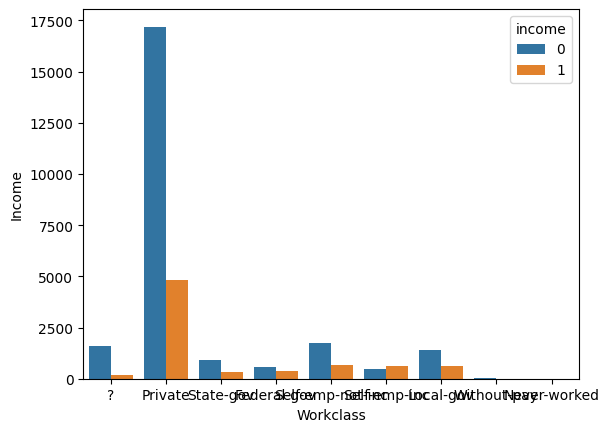

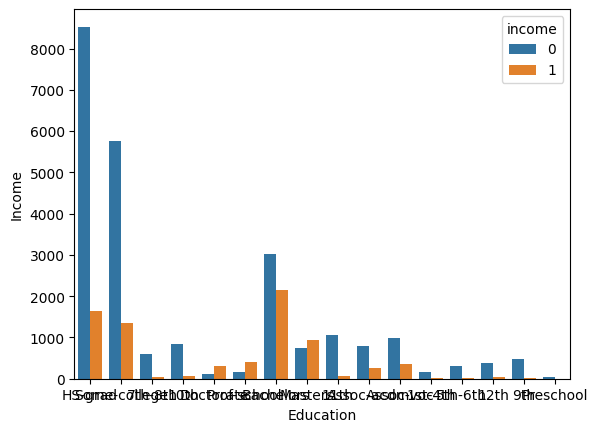

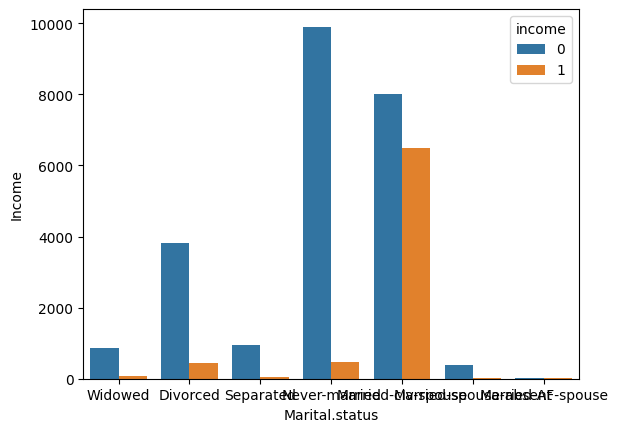

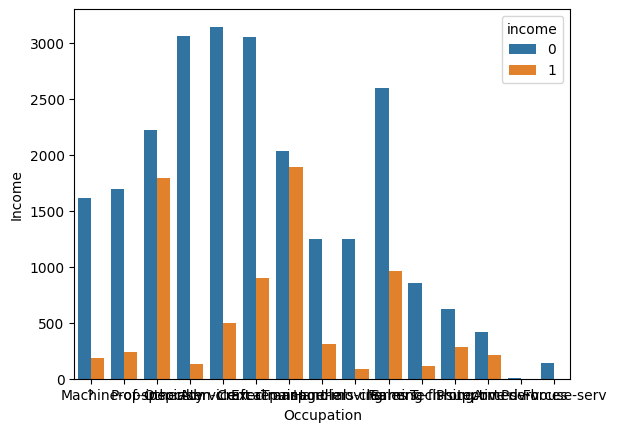

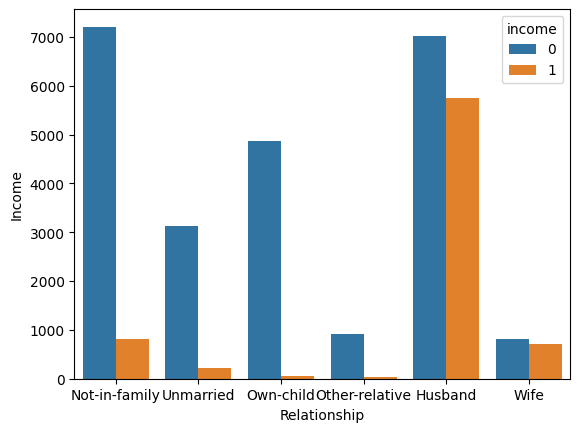

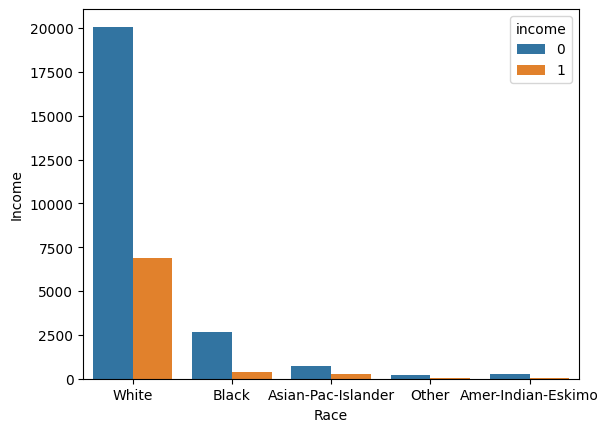

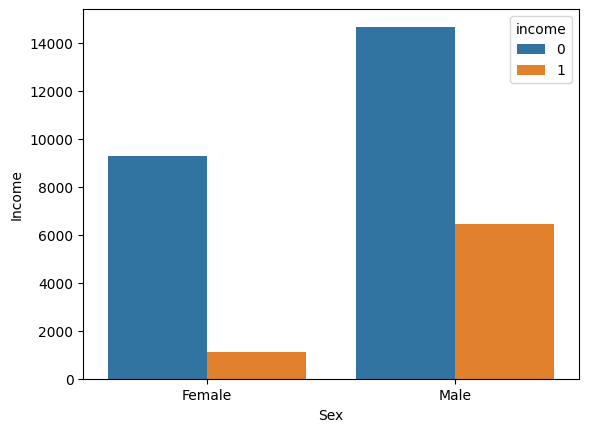

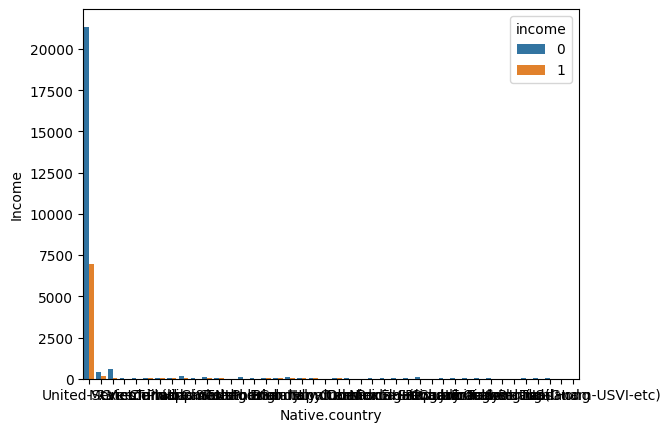

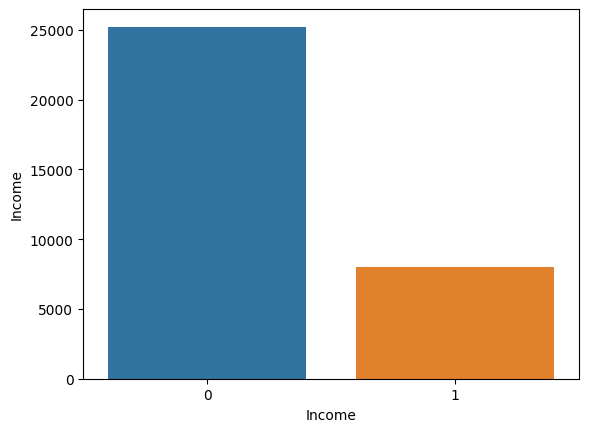

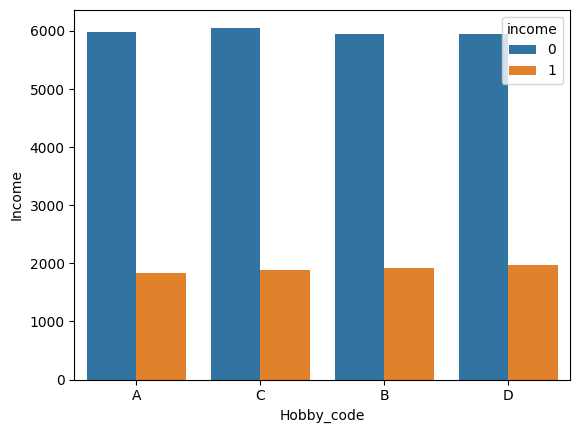

In [153]:
for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df,x=col, hue='income')
    plt.xlabel(col.capitalize())
    plt.ylabel('Income')
    plt.show()

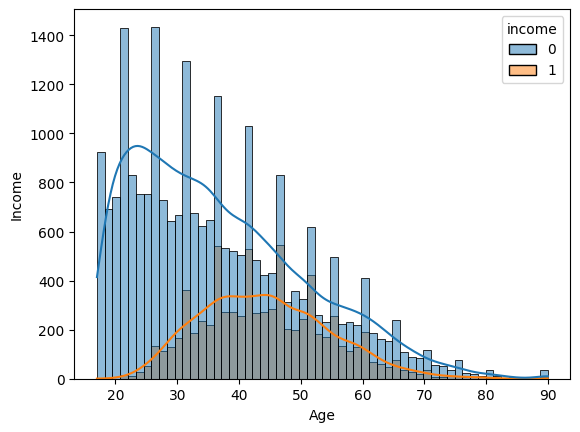

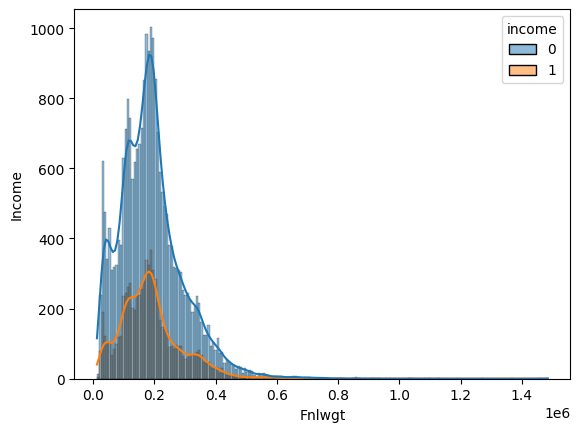

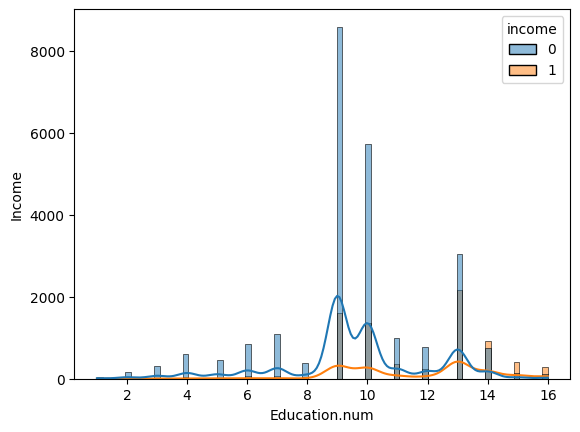

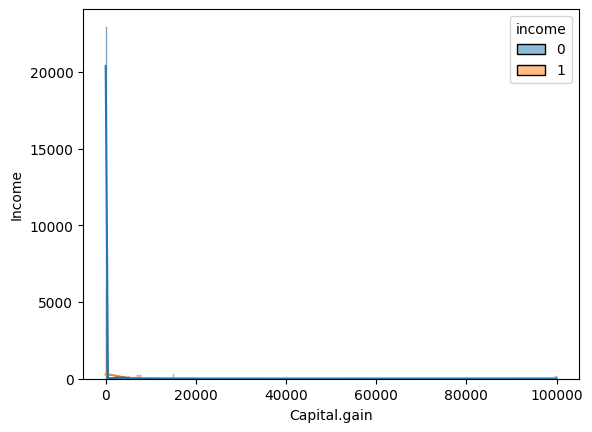

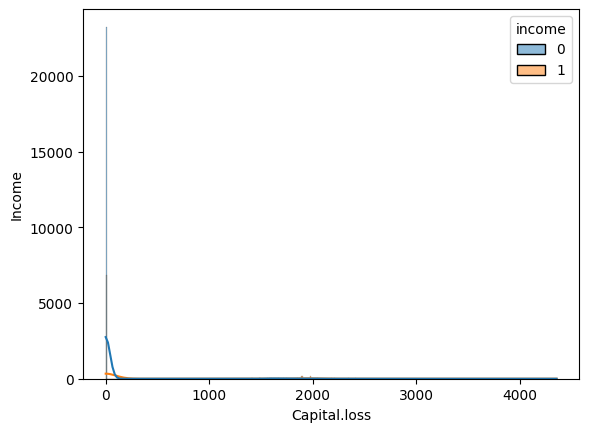

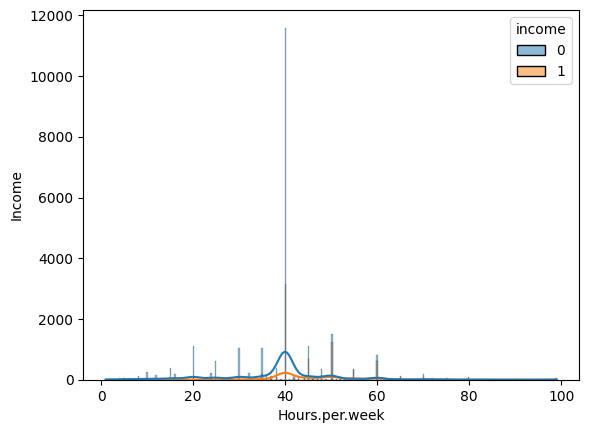

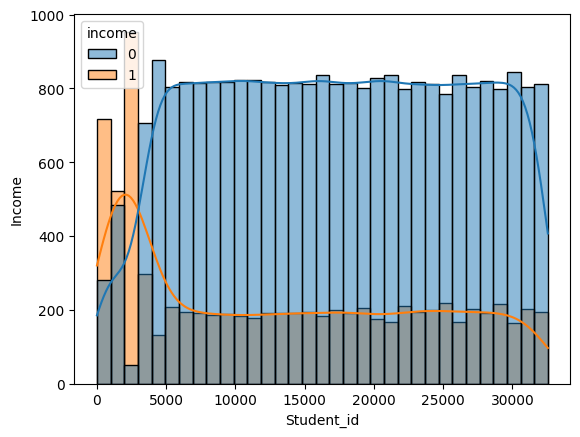

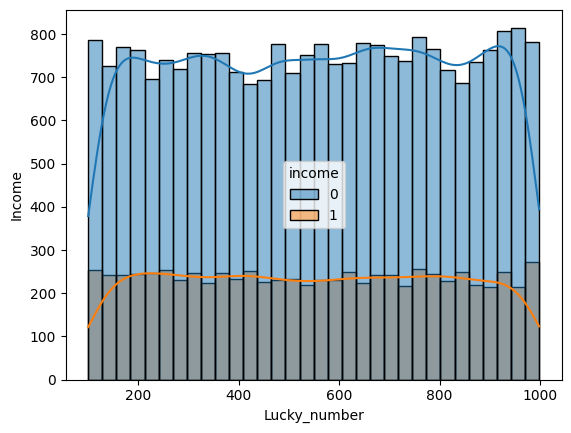

In [154]:
for col in numerical_cols:
    plt.figure()
    sns.histplot(data=df,x=col, hue='income',kde=True)
    plt.xlabel(col.capitalize())
    plt.ylabel('Income')
    plt.show()

In [155]:
# df = df.drop('lucky_number', axis=1)
# df = df.drop('student_id', axis=1)
# df.head()

In [230]:
numerical_cols

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

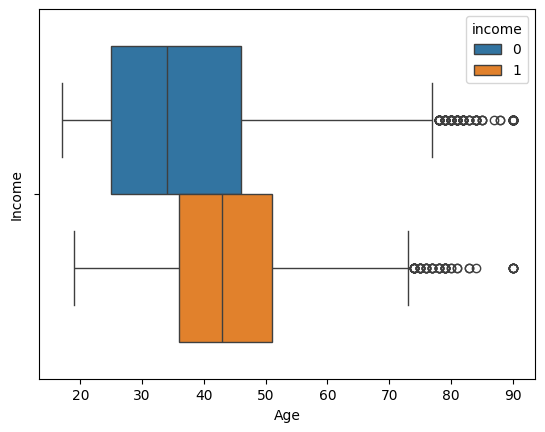

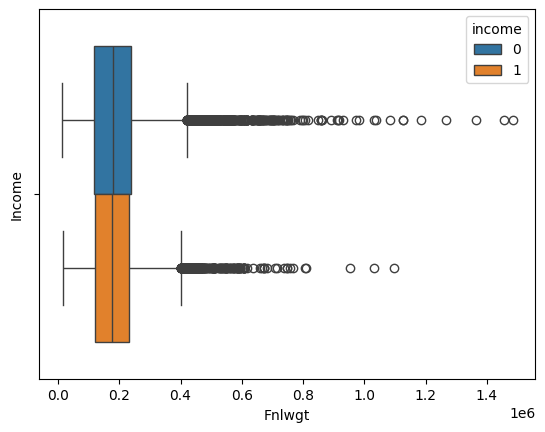

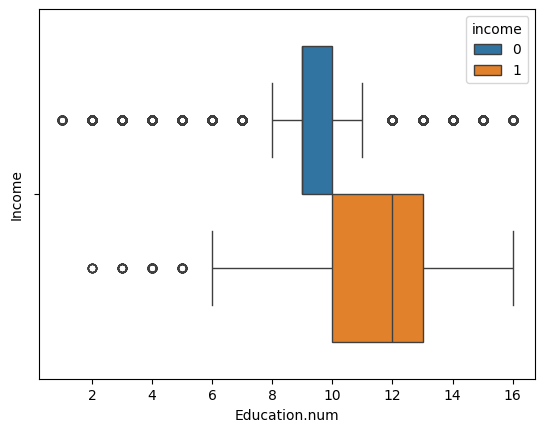

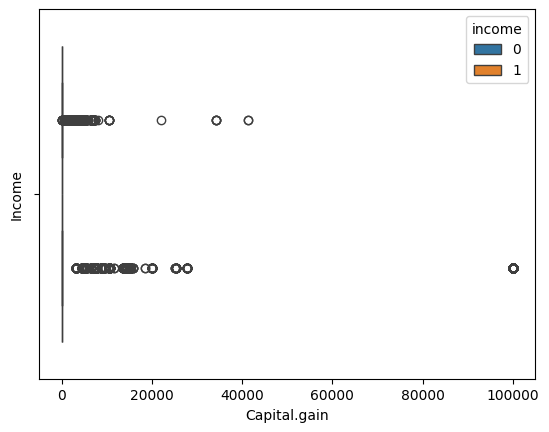

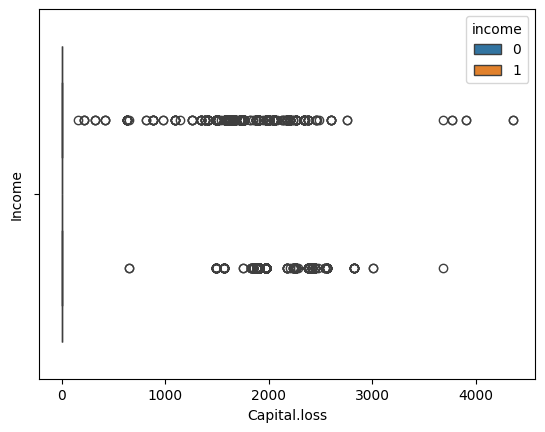

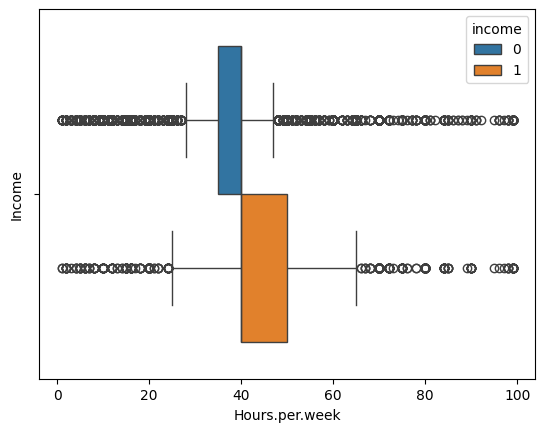

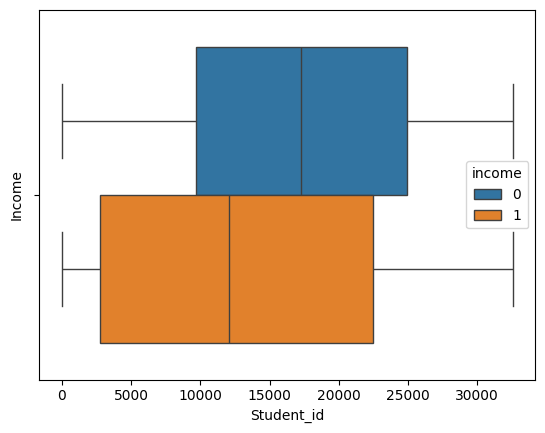

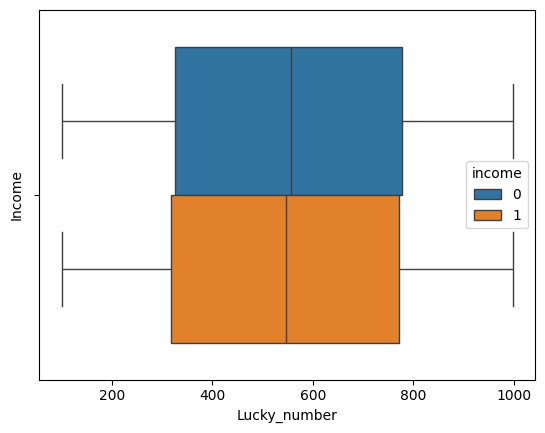

In [156]:
for col in numerical_cols:
    plt.figure()
    sns.boxplot(data=df,x=col, hue='income')
    plt.xlabel(col.capitalize())
    plt.ylabel('Income')
    plt.show()

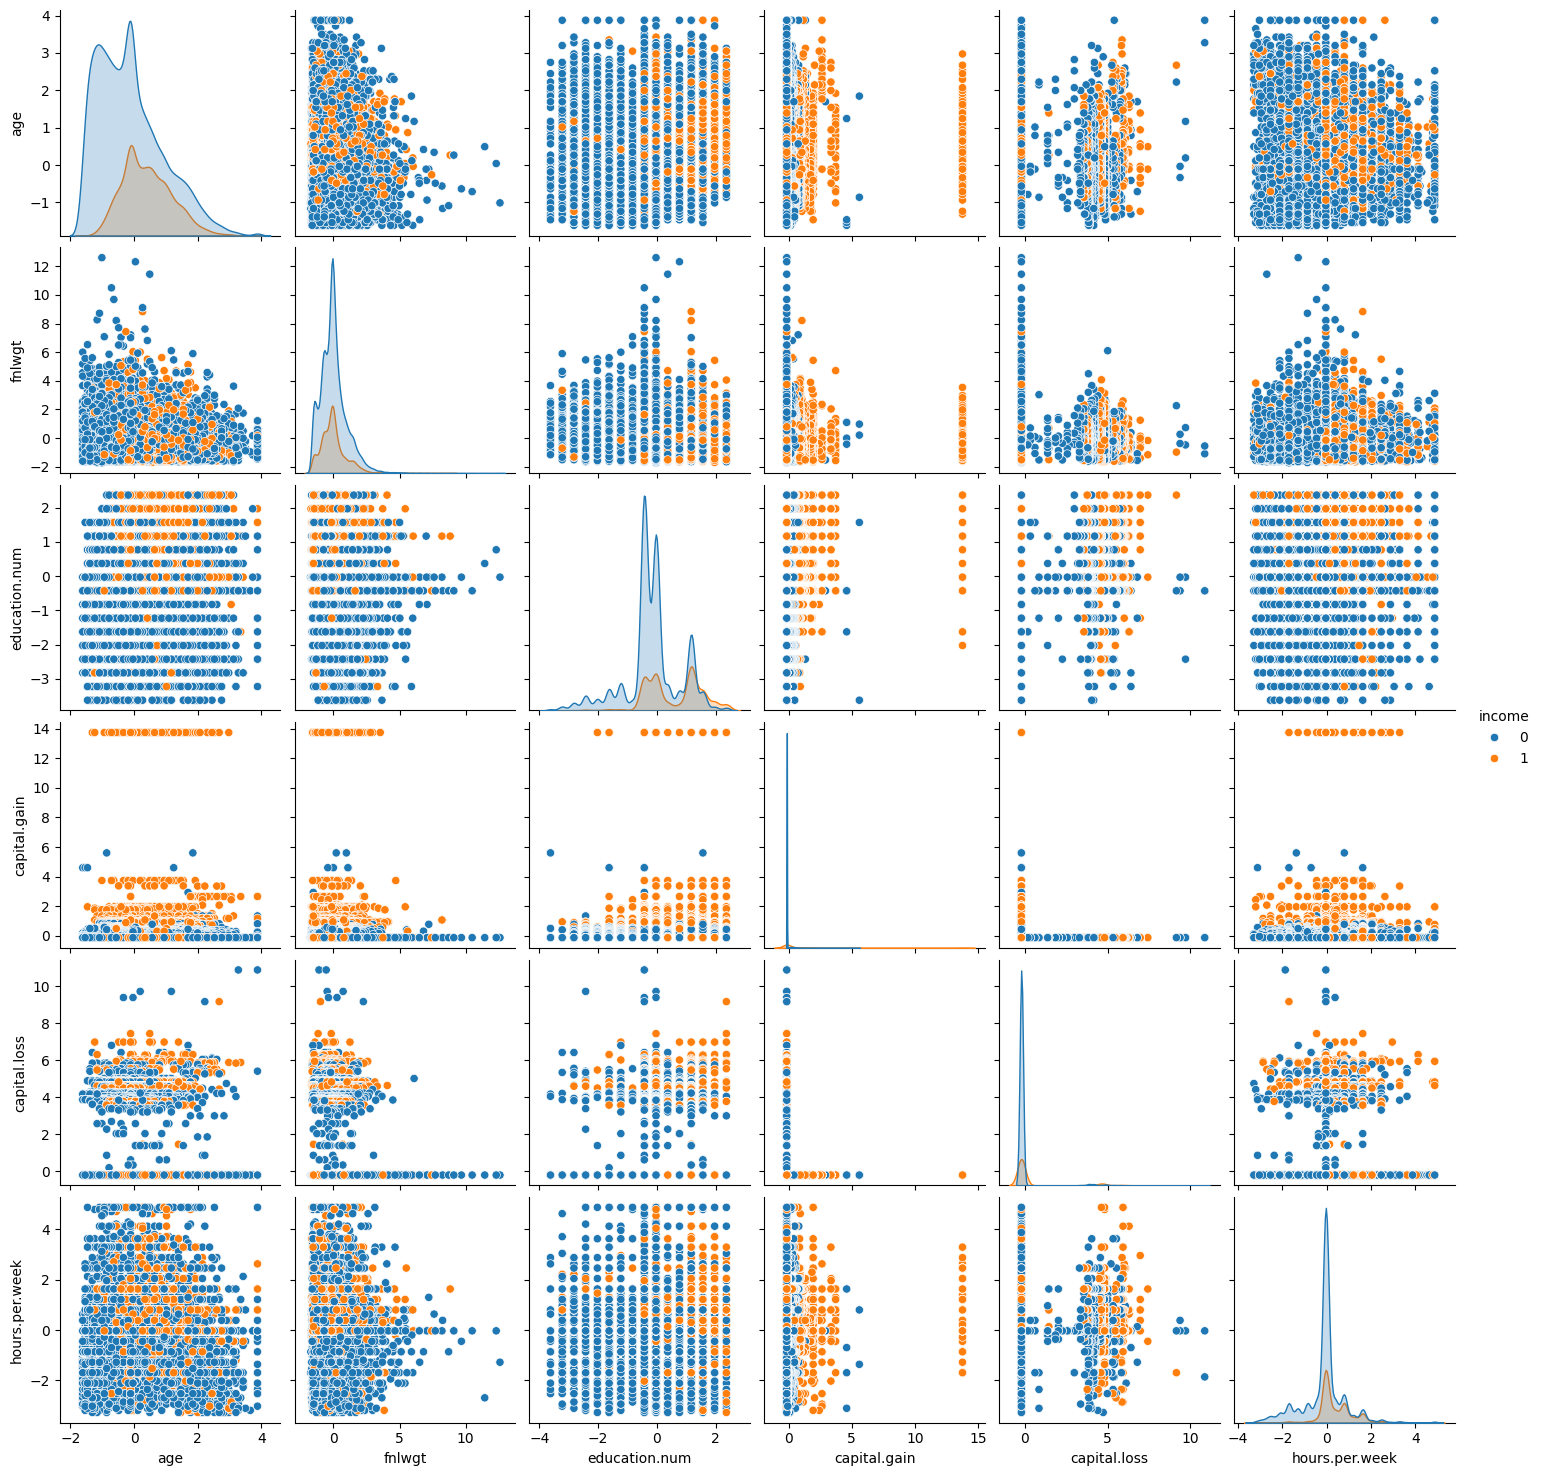

In [229]:
sns.pairplot(df, vars=numerical_cols, hue='income')
plt.show()

In [157]:
df = df.drop('lucky_number', axis=1)
df = df.drop('student_id', axis=1)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hobby_code
0,90.0,?,77053.0,HS-grad,9.0,Widowed,?,Not-in-family,White,NaN,0.0,4356.0,40.0,United-States,0,A
1,82.0,Private,132870.0,HS-grad,9.0,NaN,NaN,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,0,A
2,66.0,?,186061.0,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0.0,NaN,40.0,United-States,0,C
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,NaN,3900.0,40.0,United-States,0,A
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0,A


In [158]:
# # Before converting
# print("Native country value counts:")
# print(df['native.country'].value_counts())

# # Check relationship with income
# print("\nIncome distribution by US vs Non-US:")
# df['is_us'] = (df['native.country'] == 'United-States').astype(int)
# print(pd.crosstab(df['is_us'], df['income'], normalize='index'))


In [160]:
df = df.replace('?',np.nan)

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hobby_code
0,90.0,NaN,77053.0,HS-grad,9.0,Widowed,NaN,Not-in-family,White,NaN,0.0,4356.0,40.0,United-States,0,A
1,82.0,Private,132870.0,HS-grad,9.0,NaN,NaN,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,0,A
2,66.0,NaN,186061.0,Some-college,10.0,Widowed,NaN,Unmarried,Black,Female,0.0,NaN,40.0,United-States,0,C
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,NaN,3900.0,40.0,United-States,0,A
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0,A


In [164]:
for col in categorical_cols:
    print(df.loc[df[col]=='?'].any().sum())

0
0
0
0
0
0
0
0
0
0


In [61]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hobby_code
0,90.0,NaN,77053.0,HS-grad,9.0,Widowed,NaN,Not-in-family,White,NaN,0.0,4356.0,40.0,United-States,0,A
1,82.0,Private,132870.0,HS-grad,9.0,NaN,NaN,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,0,A
2,66.0,NaN,186061.0,Some-college,10.0,Widowed,NaN,Unmarried,Black,Female,0.0,NaN,40.0,United-States,0,C
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,NaN,3900.0,40.0,United-States,0,A
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0,A


In [165]:
hs_grad = ['HS-grad', '11th', '10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

df['education'].replace(to_replace=hs_grad, value='HS-grad',inplace=True)
df['education'].replace(to_replace=elementary,value='elementary_school', inplace=True)

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hobby_code
0,90.0,NaN,77053.0,HS-grad,9.0,Widowed,NaN,Not-in-family,White,NaN,0.0,4356.0,40.0,United-States,0,A
1,82.0,Private,132870.0,HS-grad,9.0,NaN,NaN,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,0,A
2,66.0,NaN,186061.0,Some-college,10.0,Widowed,NaN,Unmarried,Black,Female,0.0,NaN,40.0,United-States,0,C
3,54.0,Private,140359.0,elementary_school,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,NaN,3900.0,40.0,United-States,0,A
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0,A


In [166]:
married = ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

df['marital.status'].replace(to_replace=married, value='Married', inplace=True)
df['marital.status'].replace(to_replace=separated,value='Seaparated',inplace=True)

df['marital.status'].value_counts()
           

marital.status
Married          14947
Never-married    10372
Seaparated        5281
Widowed            959
Name: count, dtype: int64

In [167]:
df = df.drop('hobby_code', axis=1)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90.0,NaN,77053.0,HS-grad,9.0,Widowed,NaN,Not-in-family,White,NaN,0.0,4356.0,40.0,United-States,0
1,82.0,Private,132870.0,HS-grad,9.0,NaN,NaN,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,0
2,66.0,NaN,186061.0,Some-college,10.0,Widowed,NaN,Unmarried,Black,Female,0.0,NaN,40.0,United-States,0
3,54.0,Private,140359.0,elementary_school,4.0,Seaparated,Machine-op-inspct,Unmarried,White,Female,NaN,3900.0,40.0,United-States,0
4,41.0,Private,264663.0,Some-college,10.0,Seaparated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0


In [168]:
df['workclass'].value_counts()

workclass
Private             22001
Self-emp-not-inc     2438
Local-gov            2022
State-gov            1263
Self-emp-inc         1070
Federal-gov           942
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [169]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employed = ['Local-gov','State-gov','Federal-gov']

df['workclass'].replace(to_replace=self_employed, value='Self_employed', inplace=True)
df['workclass'].replace(to_replace=govt_employed, value='Gelf_employed', inplace=True)
df['workclass'].value_counts()

workclass
Private          22001
Gelf_employed     4227
Self_employed     3508
Without-pay         14
Never-worked         7
Name: count, dtype: int64

In [170]:
df['native.country'].value_counts()

native.country
United-States                 28283
Mexico                          621
Philippines                     193
Germany                         133
Canada                          118
Puerto-Rico                     110
El-Salvador                     104
India                            99
Cuba                             94
England                          82
Jamaica                          78
South                            78
Italy                            70
China                            70
Dominican-Republic               69
Vietnam                          64
Japan                            62
Guatemala                        61
Poland                           60
Columbia                         54
Taiwan                           50
Haiti                            39
Iran                             35
Nicaragua                        34
Portugal                         33
Peru                             31
Greece                           28
France       

In [171]:
# Replace countries with 'US' or 'Non-US'
df['native.country'] = df['native.country'].apply(lambda x: 'US' if x == 'United-States' else 'Non-US')

# Check the counts to verify
df['native.country'].value_counts()


native.country
US        28283
Non-US     4929
Name: count, dtype: int64

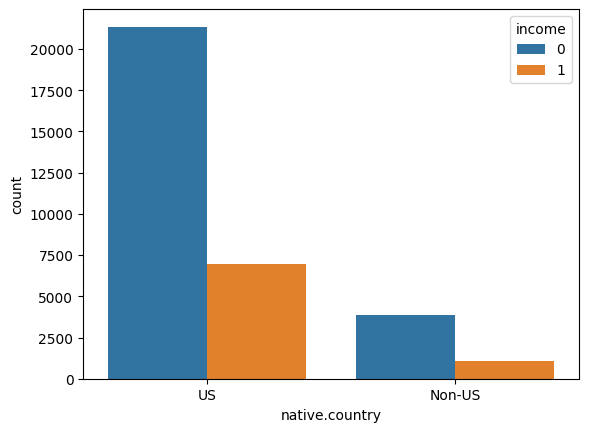

In [172]:
sns.countplot(x='native.country', data=df, hue ='income')
plt.show()

In [174]:
categorical_cols = df.select_dtypes(include=object).columns.to_list()
categorical_cols.remove('income')
categorical_cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [176]:
for col in categorical_cols:
        df[col].fillna(df[col].mode()[0],inplace=True)

df.isnull().sum()

age               1668
workclass            0
fnlwgt            1652
education            0
education.num     1663
marital.status       0
occupation           0
relationship         0
race                 0
sex                  0
capital.gain      1661
capital.loss      1668
hours.per.week    1656
native.country       0
income               0
dtype: int64

In [177]:
numerical_cols= df.select_dtypes(include=np.number).columns.to_list()
numerical_cols

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

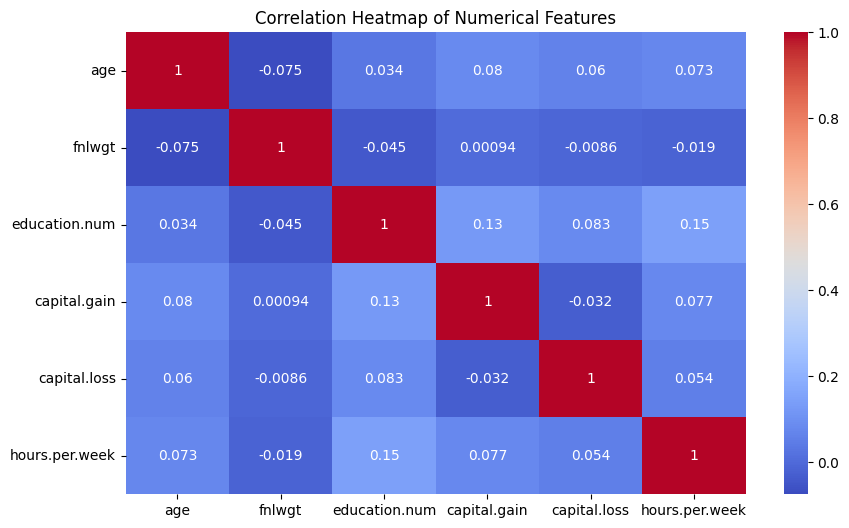

In [178]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [179]:
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [180]:
#Scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,3.875699,Private,-1.088568,HS-grad,-0.430066,Widowed,Prof-specialty,Not-in-family,White,Male,-0.141747,10.869278,-0.033680,US,0
1,3.273971,Private,-0.545943,HS-grad,-0.430066,Married,Prof-specialty,Not-in-family,White,Female,-0.141747,10.869278,-1.864397,US,0
2,2.070517,Private,-0.028847,Some-college,-0.030688,Widowed,Prof-specialty,Unmarried,Black,Female,-0.141747,-0.211076,-0.033680,US,0
3,1.167926,Private,-0.473139,elementary_school,-2.426957,Seaparated,Machine-op-inspct,Unmarried,White,Female,-0.141747,9.709351,-0.033680,US,0
4,0.190119,Private,0.735282,Some-college,-0.030688,Seaparated,Prof-specialty,Own-child,White,Female,-0.141747,9.709351,-0.033680,US,0


In [182]:
df['income'].isnull().sum()

np.int64(0)

In [ ]:
#One hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.shape


(33212, 47)

In [188]:
bool_cols = df_encoded.select_dtypes('bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)
df_encoded.shape

(33212, 47)

In [199]:
# Label encoding of the income variable

from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

df_encoded['income'] = le.fit_transform(df_encoded['income'])
df_encoded['income'].value_counts()


income
0    25216
1     7996
Name: count, dtype: int64

In [208]:
#Performing Train Test Split

X= df_encoded.drop('income', axis=1)
X.head()
y= df_encoded['income']
y.shape



(33212,)

In [233]:
X_test, X_train, y_test, y_train = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)



0.802363656893372
Confusion Matrix is :  [[15947  4225]
 [ 1026  5371]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86     20172
           1       0.56      0.84      0.67      6397

    accuracy                           0.80     26569
   macro avg       0.75      0.82      0.77     26569
weighted avg       0.85      0.80      0.81     26569



<Axes: >

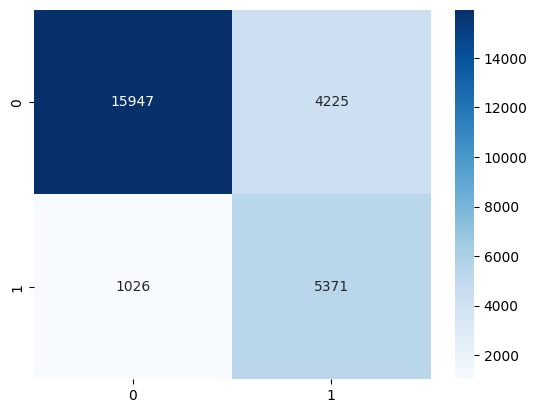

In [234]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix is : ", cm)
print(classification_report(y_test,y_pred))
sns.heatmap(cm, annot=True, cmap='Blues',fmt='d')


0.8018743648613045
[[17447  2725]
 [ 2539  3858]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     20172
           1       0.59      0.60      0.59      6397

    accuracy                           0.80     26569
   macro avg       0.73      0.73      0.73     26569
weighted avg       0.80      0.80      0.80     26569



<Axes: >

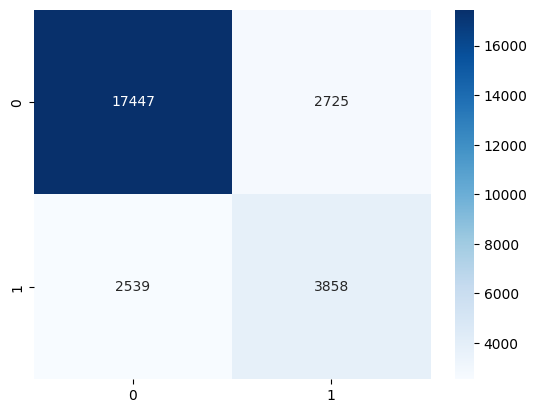

In [235]:
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train,y_train)

dt_y_pred = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test,dt_y_pred)
print(accuracy_dt)
dt_cm = confusion_matrix(y_test,dt_y_pred)
print(dt_cm)
print(classification_report(y_test,dt_y_pred))
sns.heatmap(dt_cm,annot=True, cmap='Blues', fmt='d')


In [236]:
rf= RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)

rf_y_pred = rf.predict(X_test)

In [237]:
print(accuracy_score(y_test,rf_y_pred))

0.8491098648801234


In [238]:
xg = XGBClassifier(class_weight='balanced')
xg.fit(X_train,y_train)

xg_y_pred = xg.predict(X_test)
print(accuracy_score(y_test,xg_y_pred))

0.8560728668749295


In [240]:
from sklearn.svm import SVC

sv = SVC(class_weight='balanced')
sv.fit(X_train,y_train)

sv_y_pred = sv.predict(X_test)

print("accuarcy_score: ", accuracy_score(y_test,sv_y_pred))

accuarcy_score:  0.7991644397606232
